In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency, ttest_1samp, ttest_ind

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# explore each attribute and its data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# THE DATA HAS NO NULL VALUES

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# THE AVERAGE SCORE IS HIGHEST IN READING AND LOWEST IN MATH
# THE DISPERSION OF VALUES IN HIGHEST IN WRITING AND LOWEST IN READING

# HYPOTHESIS TESTING
Hypothesis 1 - There is no significant difference between a student's performance in any skills - reading, writing, or math.


Ho (NULL hypothesis) - There is no difference in the performance of students between math, reading, and writing skills.

Ha (Alternative hypothesis) - There is a difference in the performance of students between math, reading, and writing skills.

C:\Users\ayush dev\AppData\Local\Temp\ipykernel_6744\3235808212.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'],label = 'Math Score')
C:\Users\ayush dev\AppData\Local\Temp\ipykernel_6744\3235808212.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'],label

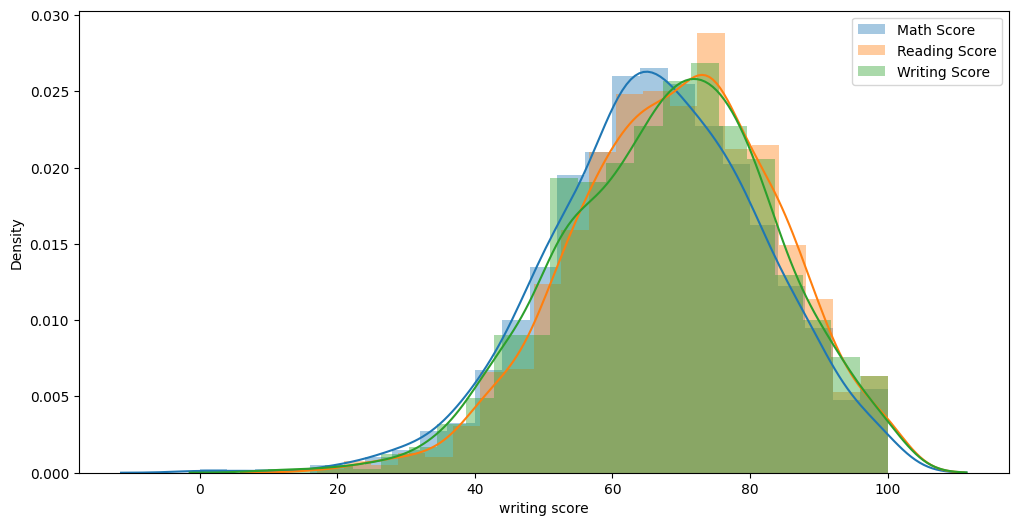

In [18]:
# comparing using histogram

plt.figure(figsize=(12,6))
sns.distplot(df['math score'],label = 'Math Score')
sns.distplot(df['reading score'],label = 'Reading Score')
sns.distplot(df['writing score'],label = 'Writing Score')
plt.legend()


In [20]:
# using one way ANOVA test

one_way_anova = f_oneway(df['reading score'], df['writing score'], df['math score'])
print(one_way_anova)

F_onewayResult(statistic=10.824191628378625, pvalue=2.0701893192229333e-05)


Since the pvalue is less than the significance values we can reject the null hypothesis and accept the alternative hypothesis
which is that there is a difference between the population mean

Hypothesis 2 - There is no relation between the gender of a student and their corresponding academic performance

Ho (NULL hypothesis) - There is no relation between the gender of a student and their corresponding academic performance


Ha (Alternative hypothesis) - There is a relation between the gender of a student and their corresponding academic performance.


In [24]:
# creating a new feature to represent if a student fails or passes
# taking average of all scores 
# if greater than 40 the student passes and vice versa

df['Overall Performance'] = (df['reading score'] + df['writing score'] + df['math score'])/3
df['Pass/Fail'] = df['Overall Performance'].apply(lambda x : 'Pass' if x>=40 else 'Fail')


In [23]:
# creating a table based on variables we defined
table1 = pd.crosstab(df['gender'], df['Pass/Fail'], margins = True)
print(table1)

Pass/Fail  Fail  Pass   All
gender                     
female       16   502   518
male         14   468   482
All          30   970  1000


In [31]:
# extracting data of students using iloc
female_data = table1.iloc[0, :].values[0 : 2].tolist()
male_data = table1.iloc[1, :].values[0 : 2].tolist()

# using chi-square test
stat, p, dof, expected = chi2_contingency([female_data, male_data])

alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
 

Independent (H0 holds true)


Since p value is greater than the significance value we can not reject null hypothesis
There is no relation between gender and academic performance

Hypothesis 3 - an educational institution claims that student receive a mean score of 70 or more on average

H0 - the overall performance is greater than or equal to 70

Ha - the overall performance is less than 70
0.0.

In [35]:
# applying a one sample t test

ttest_1samp(a = df['Overall Performance'], popmean = 70)

TtestResult(statistic=-4.944665643928837, pvalue=8.942878479352004e-07, df=999)

Since pvalue is less than significance value we can reject the null hypothesis 

In [37]:
print('Mean Math Score of Students With Test Preparation is - {}'.format(df[df['test preparation course'] == 'completed']['math score'].mean()))
print('Mean Math Score of Students Without Test Preparation is - {}'.format(df[df['test preparation course'] == 'none']['math score'].mean()))

Mean Math Score of Students With Test Preparation is - 69.69553072625699
Mean Math Score of Students Without Test Preparation is - 64.0778816199377


In [36]:
comp = df[df['test preparation course'] == 'completed']['math score'].mean()
comp

69.69553072625699

Hypothesis 4 - There is no difference in the mean math score of students who have preparation and those who dont

H0 - there is no difference in students math score irrespective of preparation

H1- there is difference in students math score those who have taken test preparation and those who did not

In [44]:
# using a two sample t test

completed = df[df['test preparation course'] == 'completed']['math score'].mean()
not_completed = df[df['test preparation course'] == 'none']['math score'].mean() 
print(completed,not_completed)

69.69553072625699 64.0778816199377


In [49]:
ttest_ind(df[df['test preparation course'] == 'completed']['math score'],df[df['test preparation course'] == 'none']['math score'])


TtestResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08, df=998.0)

Since pvalue is less than significance value we reject the null hypothesis